# MultiScaleDataMining_HW03_Lec05_LogisticRegression <br>

## 2021020706_김수정

 All assignments should be done with Python. I recommend to use Jupyter Notebook or Google Colab Notebook. All codes and results should be shown in a single document. You can easily make such a document by downloading the whole page from the Notebook. Please submit it in a pdf form by printing the downloaded document in a pdf format.

Assignment

Perform this assignment with "carseats.csv" in the previous assignment. Use the first 70 samples as a training set and the rest 30 samples as a test set. Discretize "Sales" at 8 and make two classes "High" if Sales >= 8 and "Low" otherwise. The discretized "Sales" is the output variable, and other variables are input variables. The included "Dummy" variables are random generated variables that has nothing to do with Sales. Here, we consider "High" class as a postiive class.

1. Perform the logistic regression with all variables. What is the accuracy of the training and test sets. Also, calculate other metrics such as confusion matrix, recall, precision, false positive rate for both training and test sets. Draw ROC curves and precision-recall curves for the both sets, and calcualte AUCs.

2. Repeat the problem 1 without Dummy variables. Does it make the better results?

3. Similar with Linear Regression case, Logistic Regression can be performed with StatsModel library. Please repate the problem 1 with StatsModel library. Can you interpret the p-value table? Does StatsModel logistic regression make the same result (i.e. the same model coefficient) with what you did in problem 1? If not, why?

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [7]:
df = pd.read_csv("carseat.csv")

Creating number mapping preprocessing for string column

In [8]:
df['ShelveLoc'] = df['ShelveLoc'].astype('category')
df['ShelveLoc'] = df['ShelveLoc'].cat.reorder_categories(['Bad','Medium','Good'], ordered=True)
df['ShelveLoc'] = df['ShelveLoc'].cat.codes

df['Urban'] = df['Urban'].astype('category')
df['Urban'] = df['Urban'].cat.reorder_categories(['Yes','No'], ordered=True)
df['Urban'] = df['Urban'].cat.codes

df['US'] = df['US'].astype('category')
df['US'] = df['US'].cat.reorder_categories(['Yes','No'], ordered=True)
df['US'] = df['US'].cat.codes

In [9]:
df['Sales_b']=df['Sales']

In [10]:
df['Sales_b']=np.where(df['Sales'] >= 8,'1', df['Sales_b'])  #High

In [11]:
df['Sales_b']=np.where(df['Sales'] < 8,'0', df['Sales_b'])  #Low

In [108]:
df['Sales_b'].unique()

array(['High', 'Low'], dtype=object)

In [109]:
df['Sales_b'].value_counts()

Low     55
High    45
Name: Sales_b, dtype: int64

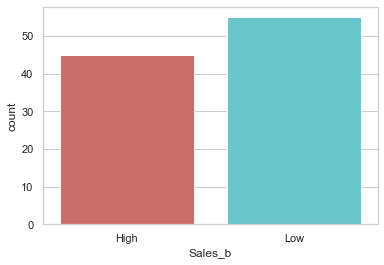

<Figure size 432x288 with 0 Axes>

In [110]:
sns.countplot(x='Sales_b',data=df,palette='hls')
plt.show()
plt.savefig('count_plot')

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

In [52]:
def mfunc(X, y, mod):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    columns = X_train.columns
    
    model = mod
    clf = model.fit(X_train, y_train)
    #training data
    pred_y = model.predict(X_train)
    print("---------------------------------")
    train_score = model.score(X_train, y_train)
    print("Train Accuracy Score:", train_score)
    
    print("\nClasification Report for Train Set")
    print(classification_report(y_train,pred_y))
    
    print("\nConfusion Matrix for Train Set")
    print(perf_measure(y_train,pred_y)) 
    
    #test data
    print("----------------------------------")    
    pred_y = model.predict(X_test)
    test_score = model.score(X_test, y_test)
    print("Test Accuracy Score:", test_score)   
    print("\nClasification Report for Test Set")
    print(classification_report(y_test,pred_y))
    
    print("\nConfusion Matrix for Test Set")
    print(perf_measure(y_test,pred_y)) 
    
    print("\n------------------------------------------\n")
    print(curve(X_train, y_train,X_test,y_test,pred_y))
    
    return X_train, X_test, y_train, y_test, clf, pred_y

In [53]:
def perf_measure(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]

    return("TP:",TP, "FP:", FP,"TN:", TN, "FN:",FN)

In [54]:
def curve(X_train, y_train,X_test,y_test,pred_y):
    nb = GaussianNB()
    nb = nb.fit(X_train, y_train)

    print("\n-------ROC Curve and precision_recall Curve for Training Data------------")
    y_probas = nb.predict_proba(X_train)
    skplt.metrics.plot_roc(y_train, y_probas)
    skplt.metrics.plot_precision_recall(y_train,y_probas)
    plt.legend()
    plt.grid()
    plt.show()
            
    print("\n-------ROC Curve and precision_recall Curve for Test Data------------")
    y_probas = nb.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas)
    skplt.metrics.plot_precision_recall(y_test,y_probas)
    
    plt.legend()
    plt.grid()
    plt.show()

In [55]:
y = df["Sales_b"].values
X = df.drop(["Sales","Sales_b"], axis=1)

###########################################################################################
1. Perform the logistic regression with all variables. What is the accuracy of the training and test sets. Also, calculate other metrics such as confusion matrix, recall, precision, false positive rate for both training and test sets. Draw ROC curves and precision-recall curves for the both sets, and calcualte AUCs. <br/>

###########################################################################################

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---------------------------------
Train Accuracy Score: 0.9

Clasification Report for Train Set
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.90      0.88      0.89        32

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70


Confusion Matrix for Train Set
('TP:', 28, 'FP:', 3, 'TN:', 35, 'FN:', 4)
----------------------------------
Test Accuracy Score: 0.8

Clasification Report for Test Set
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.77      0.77      0.77        13

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30


Confusion Matrix for Test Set
('TP:', 10, 'FP:', 3, 'TN:', 14, 'FN:', 3)

-----

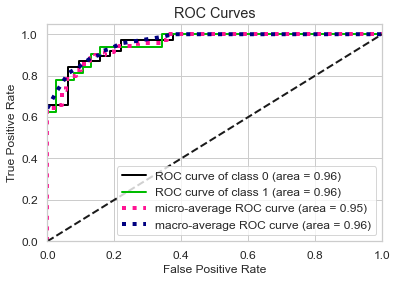

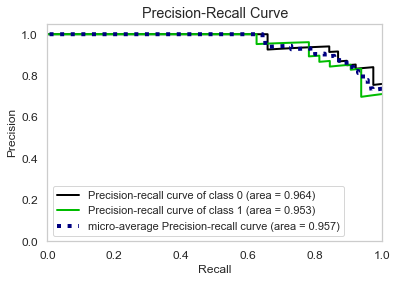


-------ROC Curve and precision_recall Curve for Test Data------------


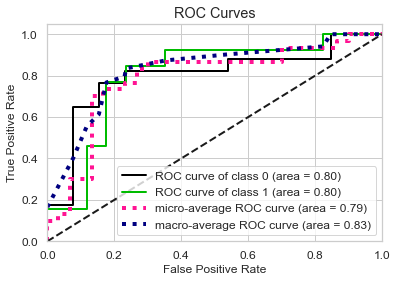

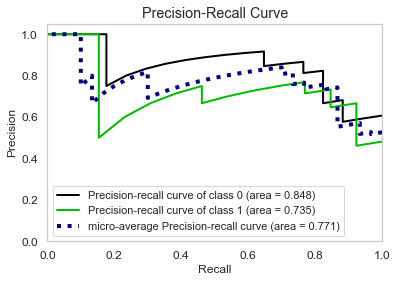

None


In [56]:
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y, LogisticRegression())

######################################################################################

<li>2. Repeat the problem 1 without Dummy variables. Does it make the better results? <br/>
 
#########################################################################################

In [169]:
y2 = df["Sales_b"].values
X2 = df.drop(["Sales","Sales_b","Dummy01","Dummy02","Dummy03","Dummy04","Dummy05","Dummy06"], axis=1)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---------------------------------
Train Accuracy Score: 0.9428571428571428

Clasification Report for Train Set
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        38
           1       0.91      0.97      0.94        32

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70


Confusion Matrix for Train Set
('TP:', 31, 'FP:', 3, 'TN:', 35, 'FN:', 1)
----------------------------------
Test Accuracy Score: 0.8666666666666667

Clasification Report for Test Set
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.85      0.85      0.85        13

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30


Confusion Matrix for Test Set
('TP:', 11, 'FP:', 

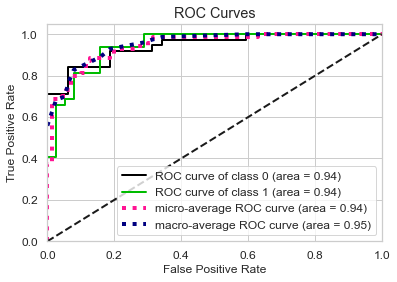

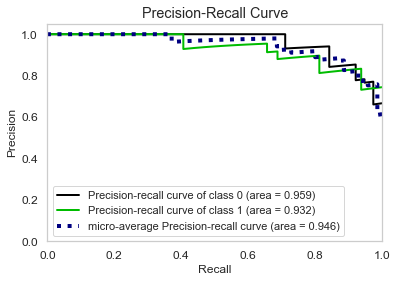


-------ROC Curve and precision_recall Curve for Test Data------------


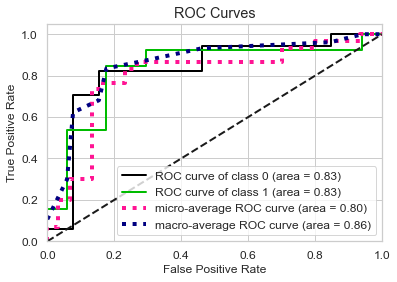

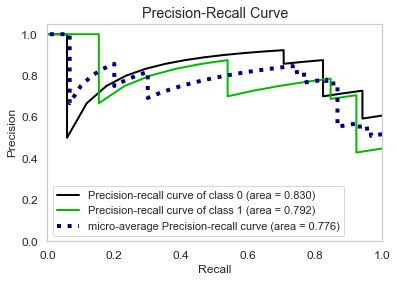

None


In [170]:
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X2, y2, LogisticRegression())

In [ ]:
<<< Does adding Dummy Variables make better results? >>>
In general, an AUC of 0.5 suggests no discrimination,
0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, 
and more than 0.9 is considered outstanding.

With Dummies AUC value: class0(Sales_Low): 0.80, class1(Sales_High): 0.80, micro-average: 0.79, macro-average: 0.83
Without Dummies AUC value: class0(Sales_Low): 0.83, class1(Sales_High): 0.83, micro-average: 0.80, macro-average: 0.86
                    
-> The AUC value are better with Dummy Variables!                     

In logistic regression models, encoding all of the independent variables as dummy variables 
allows easy interpretation and calculation of the odds ratios, 
and increases the stability and significance of the coefficients.

Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. 
This means that we don’t need to write out separate equation models for each subgroup. 
The dummy variables act like ‘switches’ that turn various parameters on and off in an equation. 
Another advantage of a 0,1 dummy-coded variable is that even though it is a nominal-level variable 
you can treat it statistically like an interval-level variable

#######################################################################
 
 <li> 3. Similar with Linear Regression case, Logistic Regression can be performed with StatsModel library. 
 Please repate the problem 1 with StatsModel library. Can you interpret the p-value table? 
 Does StatsModel logistic regression make the same result 
 (i.e. the same model coefficient) with what you did in problem 1? If not, why? 
 
#######################################################################

In [4]:
import statsmodels.api as sm
from pandas import DataFrame

In [12]:
X = df[['CompPrice','Income','Advertising','Population','Price','Age','Education','Dummy01','Dummy02','Dummy03','Dummy04','Dummy05','Dummy06']]
y = df[["Sales_b"]]

In [13]:
X = X.to_numpy()
#y = y.to_numpy()

In [14]:
X = X.astype(int)
y = y.astype(int)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
import statsmodels.formula.api as smf
#P >|z| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
regr = LogisticRegression()
regr.fit(X_train, y_train)

X_train = sm.add_constant(X_train) 

logit = sm.GLM(y_train, X_train, family=sm.families.Binomial())
res = logit.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Sales_b   No. Observations:                   70
Model:                            GLM   Df Residuals:                       56
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21.886
Date:                Sun, 10 Oct 2021   Deviance:                       43.772
Time:                        13:39:26   Pearson chi2:                     62.3
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4391      5.916     -1.257      0.2

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<<< P-value analysis for Linear Regression in the last homework >>>
A p-value of less than 0.05 is considered as statistically significant. 
The columns 'CompPrice', 'Advertising', 'Price', 'Age' are considered to be statistically significant.

There is a linear relationship between dependent variable and independent variables. 
However, the p-values of all independent variables in “Coefficients” table show that among 16 independent variables, 
only 4 have a statistically significant impact on the outcome variable.

<<< P-value analysis for Logistic Regression >>>
The column with P>|t| is our p-value for input variables.
A p-value of less than 0.05 is considered as statistically significant. 
The columns 'CompPrice', 'Income','Advertising', 'Population', 'Price', 'Age' are considered to be statistically significant.

In Logistic Regression, the p-values of all independent variables in “Coefficients” table show that among 16 independent variables, 
6 have a statistically significant impact on the outcome variable.
Compared to Linear Regression, variables 'Income' and 'Population' were added. 

<<< The P-value Result Difference in Logistic Regression and Linear Regression >>> 
The linear regression of 'Sales' against the categorical variables includes no information about classification problems.
Are the assumptions of the logistic regression or of the linear regression most appropriate? 
If these were all independent variables then the logistic regression would be more appropriate. 

The purpose of Linear Regression is to find the best-fitted line 
while Logistic regression is one step ahead and fitting the line values to the sigmoid curve.
Linear Regression is used to handle regression problems whereas Logistic regression is used to handle the classification problems.
Linear regression provides a continuous output but Logistic regression provides discrete output.

Logistic regression analysis is used to examine the association of (categorical or continuous) independent variable(s) 
with one dichotomous(이분법적인) dependent variable. 
This is in contrast to linear regression analysis in which the dependent variable is a continuous variable.

As a result, the assumption for this dataset is more appropriate in Logistic Regression.